In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Data source: https://www.kaggle.com/milanzdravkovic/pharma-sales-data
df = pd.read_csv('salesdaily.csv')

In [5]:
df.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,1/2/2014,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
1,1/3/2014,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2,1/4/2014,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
3,1/5/2014,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
4,1/6/2014,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


In [6]:
df['datum'] = pd.to_datetime(df['datum'])

df.rename(columns=({'datum': 'Date'}), inplace=True);

df.set_index('Date', inplace=True)

df.head()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
Date,,,,,,,,,,,,
2014-01-02,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
2014-01-03,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2014-01-04,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
2014-01-05,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
2014-01-06,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


In [7]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

M01AB - 0.0%
M01AE - 0.0%
N02BA - 0.0%
N02BE - 0.0%
N05B - 0.0%
N05C - 0.0%
R03 - 0.0%
R06 - 0.0%
Year - 0.0%
Month - 0.0%
Hour - 0.0%
Weekday Name - 0.0%


In [8]:
pharma = df.drop(['Year', 'Month', 'Hour', 'Weekday Name'], axis=1)

pharma.dtypes

M01AB    float64
M01AE    float64
N02BA    float64
N02BE    float64
N05B     float64
N05C     float64
R03      float64
R06      float64
dtype: object

In [9]:
pharma.head()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
Date,,,,,,,,
2014-01-02,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0
2014-01-03,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0
2014-01-04,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0
2014-01-05,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0
2014-01-06,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0


In [10]:
pharma.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
M01AB,2106.0,5.033683,2.737579,0.0,3.00,4.99,6.670,17.340000
M01AE,2106.0,3.895830,2.133337,0.0,2.34,3.67,5.138,14.463000
N02BA,2106.0,3.880441,2.384010,0.0,2.00,3.50,5.200,16.000000
N02BE,2106.0,29.917095,15.590966,0.0,19.00,26.90,38.300,161.000000
N05B,2106.0,8.853627,5.605605,0.0,5.00,8.00,12.000,54.833333
N05C,2106.0,0.593522,1.092988,0.0,0.00,0.00,1.000,9.000000
R03,2106.0,5.512262,6.428736,0.0,1.00,4.00,8.000,45.000000
R06,2106.0,2.900198,2.415816,0.0,1.00,2.00,4.000,15.000000


In [11]:
pharma.shape

(2106, 8)

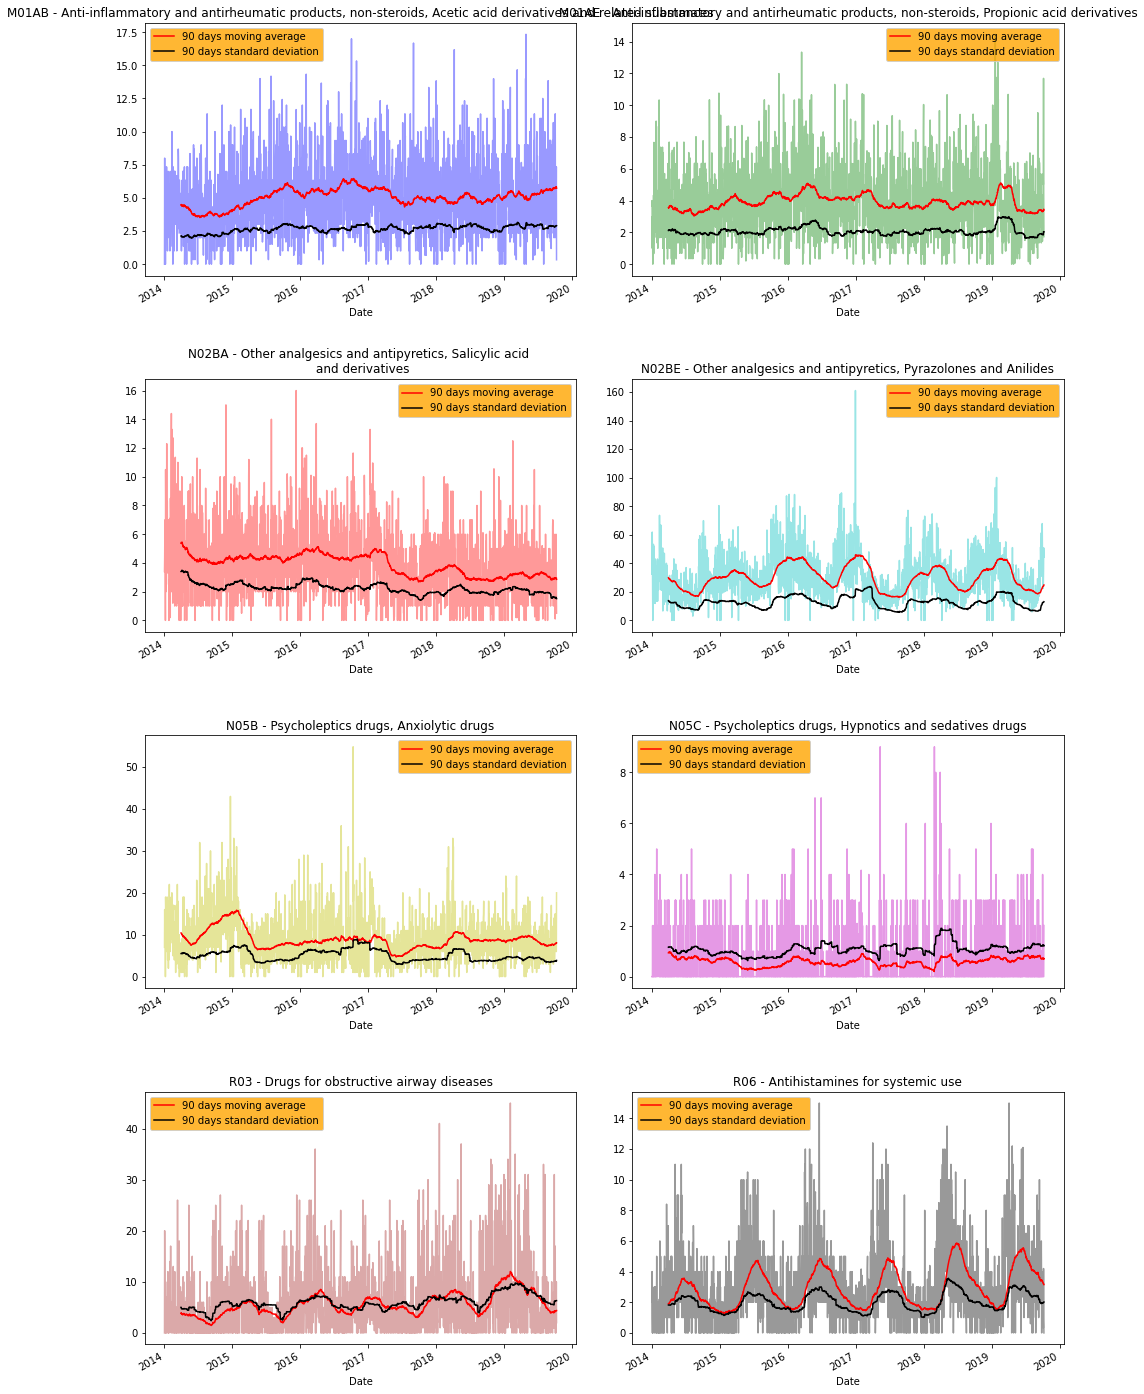

In [12]:
plt.figure(figsize=(14,20))

plt.subplot(4,2,1)
plt.plot(pharma['M01AB'], 'b', alpha=0.4)
pharma['M01AB'].rolling(90).mean().plot(color='r', label='90 days moving average')
pharma['M01AB'].rolling(90).std().plot(color='black', label='90 days standard deviation')
plt.title('M01AB - Anti-inflammatory and antirheumatic products, non-steroids, Acetic acid derivatives and related substances')
plt.legend(facecolor='orange')


plt.subplot(4,2,2)
plt.plot(pharma['M01AE'], 'g', alpha=0.4)
pharma['M01AE'].rolling(90).mean().plot(color='r', label='90 days moving average')
pharma['M01AE'].rolling(90).std().plot(color='black', label='90 days standard deviation')
plt.title('M01AE - Anti-inflammatory and antirheumatic products, non-steroids, Propionic acid derivatives')
plt.legend(facecolor='orange')


plt.subplot(4,2,3)
plt.plot(pharma['N02BA'], 'r', alpha=0.4)
pharma['N02BA'].rolling(90).mean().plot(color='r', label='90 days moving average')
pharma['N02BA'].rolling(90).std().plot(color='black', label='90 days standard deviation')
plt.title('N02BA - Other analgesics and antipyretics, Salicylic acid \n and derivatives')
plt.legend(facecolor='orange')


plt.subplot(4,2,4)
plt.plot(pharma['N02BE'], 'c', alpha=0.4)
pharma['N02BE'].rolling(90).mean().plot(color='r', label='90 days moving average')
pharma['N02BE'].rolling(90).std().plot(color='black', label='90 days standard deviation')
plt.title('N02BE - Other analgesics and antipyretics, Pyrazolones and Anilides')
plt.legend(facecolor='orange')


plt.subplot(4,2,5)
plt.plot(pharma['N05B'], 'y', alpha=0.4)
pharma['N05B'].rolling(90).mean().plot(color='r', label='90 days moving average')
pharma['N05B'].rolling(90).std().plot(color='black', label='90 days standard deviation')
plt.title('N05B - Psycholeptics drugs, Anxiolytic drugs')
plt.legend(facecolor='orange')


plt.subplot(4,2,6)
plt.plot(pharma['N05C'], 'm', alpha=0.4)
pharma['N05C'].rolling(90).mean().plot(color='r', label='90 days moving average')
pharma['N05C'].rolling(90).std().plot(color='black', label='90 days standard deviation')
plt.title('N05C - Psycholeptics drugs, Hypnotics and sedatives drugs')
plt.legend(facecolor='orange')


plt.subplot(4,2,7)
plt.plot(pharma['R03'], 'brown', alpha=0.4)
pharma['R03'].rolling(90).mean().plot(color='r', label='90 days moving average')
pharma['R03'].rolling(90).std().plot(color='black', label='90 days standard deviation')
plt.title('R03 - Drugs for obstructive airway diseases')
plt.legend(facecolor='orange')


plt.subplot(4,2,8)
plt.plot(pharma['R06'], 'k', alpha=0.4)
pharma['R06'].rolling(90).mean().plot(color='r', label='90 days moving average')
pharma['R06'].rolling(90).std().plot(color='black', label='90 days standard deviation')
plt.title('R06 - Antihistamines for systemic use')
plt.legend(facecolor='orange')


plt.tight_layout(pad=3.0)

In [13]:
pharma['N02BE'].nlargest(10)

Date
2016-12-30    161.00
2016-12-31    108.70
2019-01-27    100.10
2019-01-26     97.80
2019-01-20     93.05
2016-10-16     89.30
2016-10-09     88.40
2016-01-09     88.30
2016-02-07     88.20
2015-12-26     87.20
Name: N02BE, dtype: float64

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

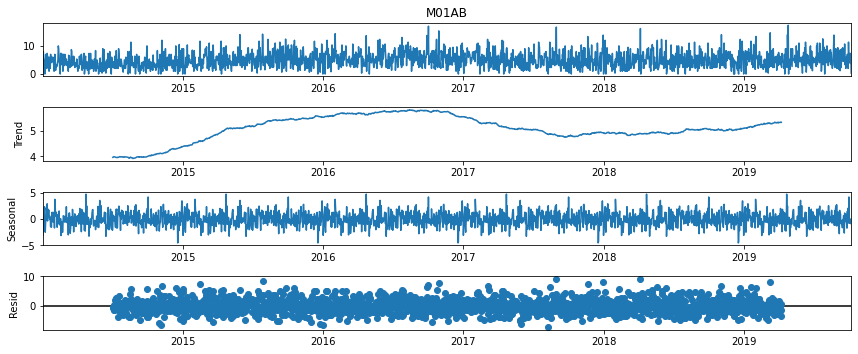

In [15]:
decomp = seasonal_decompose(pharma['M01AB'], period=365)

fig = decomp.plot()
fig.set_size_inches(12,5);
fig.tight_layout(pad=1.0)

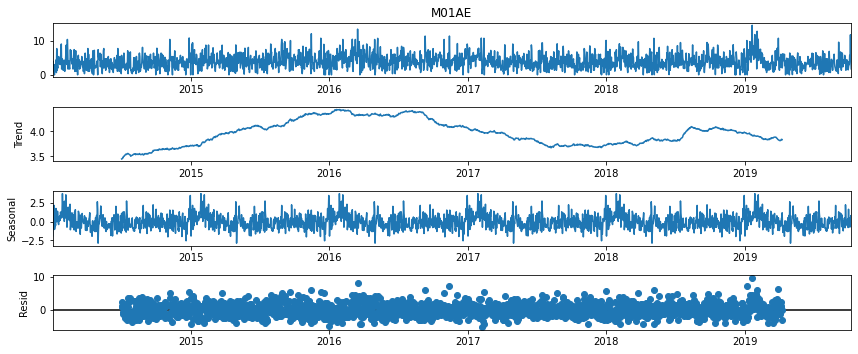

In [16]:
decomp = seasonal_decompose(pharma['M01AE'], period=365)

fig = decomp.plot()
fig.set_size_inches(12,5);
fig.tight_layout(pad=1.0)

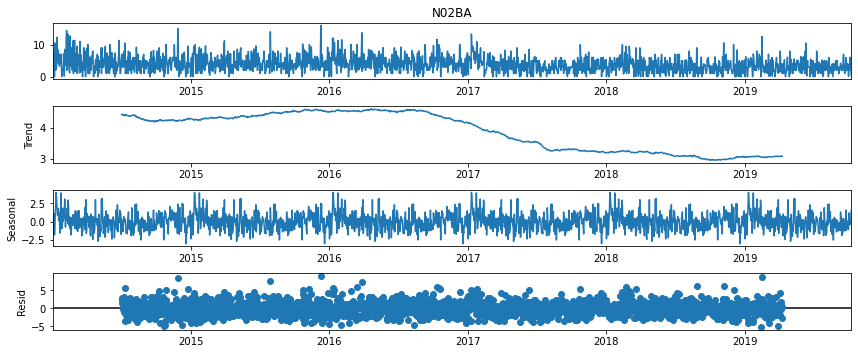

In [17]:
decomp = seasonal_decompose(pharma['N02BA'], period=365)

fig = decomp.plot()
fig.set_size_inches(12,5);
fig.tight_layout(pad=1.0)

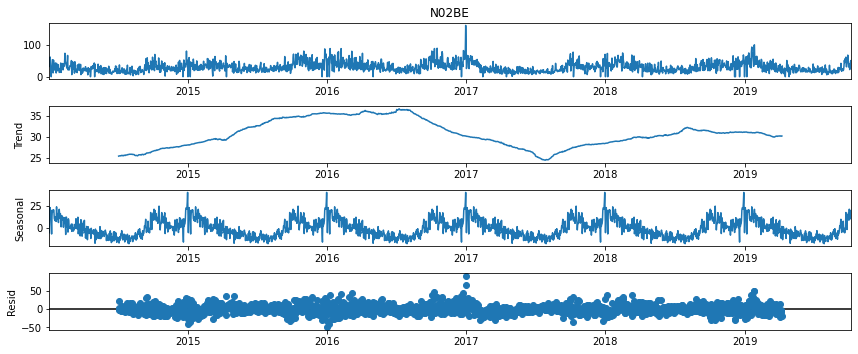

In [18]:
decomp = seasonal_decompose(pharma['N02BE'], period=365)

fig = decomp.plot()
fig.set_size_inches(12,5);
fig.tight_layout(pad=1.0)

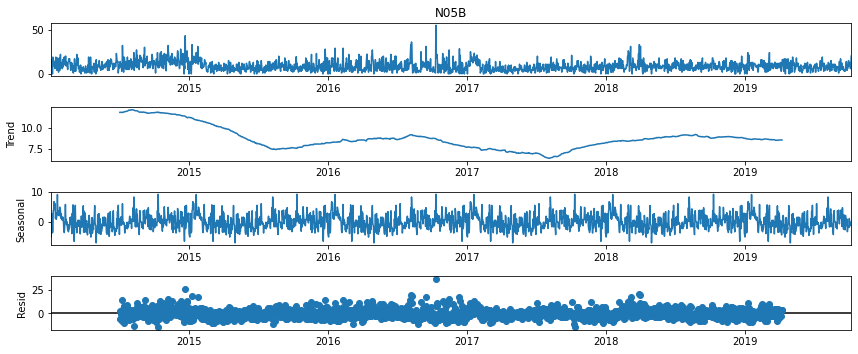

In [19]:
decomp = seasonal_decompose(pharma['N05B'], period=365)

fig = decomp.plot()
fig.set_size_inches(12,5);
fig.tight_layout(pad=1.0)

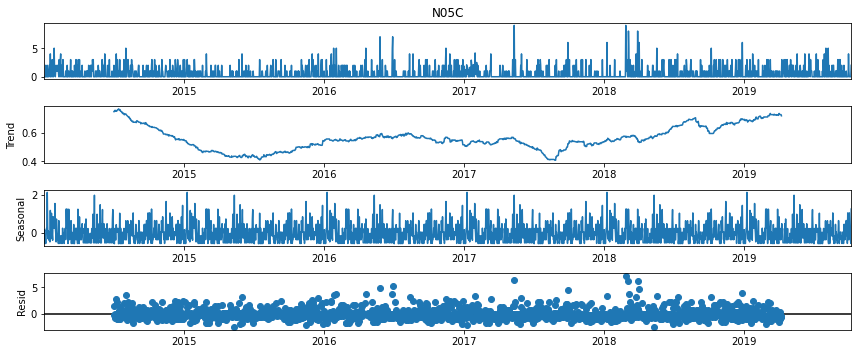

In [20]:
decomp = seasonal_decompose(pharma['N05C'], period=365)

fig = decomp.plot()
fig.set_size_inches(12,5);
fig.tight_layout(pad=1.0)

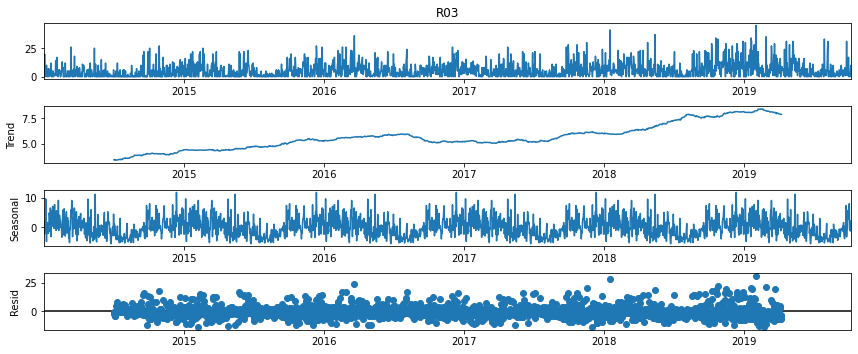

In [21]:
decomp = seasonal_decompose(pharma['R03'], period=365)

fig = decomp.plot()
fig.set_size_inches(12,5);
fig.tight_layout(pad=1.0)

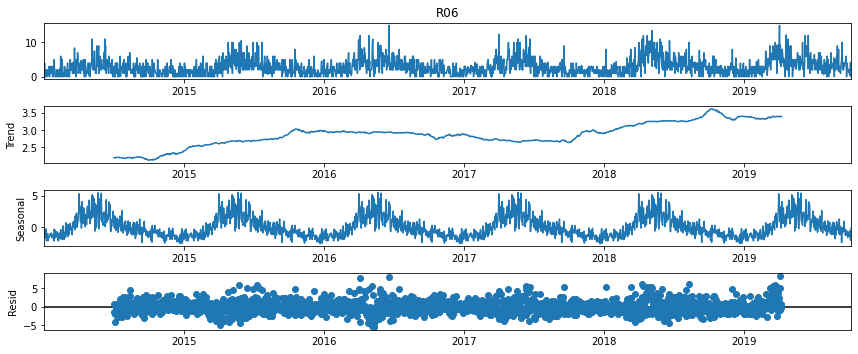

In [22]:
decomp = seasonal_decompose(pharma['R06'], period=365)

fig = decomp.plot()
fig.set_size_inches(12,5);
fig.tight_layout(pad=1.0)